<a href="https://colab.research.google.com/github/thara-1996/computer_vision/blob/main/Exersice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

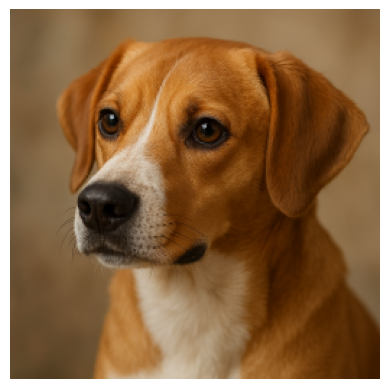

In [2]:
import cv2
from matplotlib import pyplot as plt
img_bgr = cv2.imread('Example-256.png', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

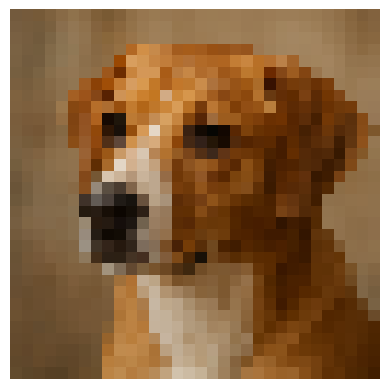

In [ ]:
import numpy as np

# Create an empty array for the subsampled image
img_32 = np.zeros((32, 32, 3), dtype=np.uint8)

# Subsample by taking every 8th pixel
for i in range(32):
    for j in range(32):
        for c in range(3):
            img_32[i, j, c] = img_rgb[i * 8, j * 8, c]

# Display the subsampled image
plt.imshow(img_32)
plt.axis("off")
plt.show()


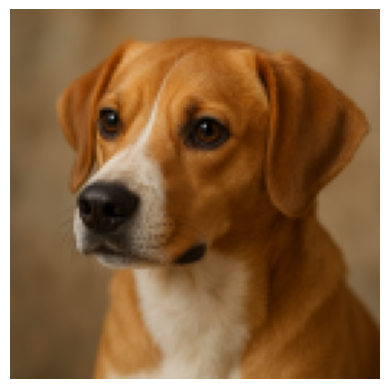

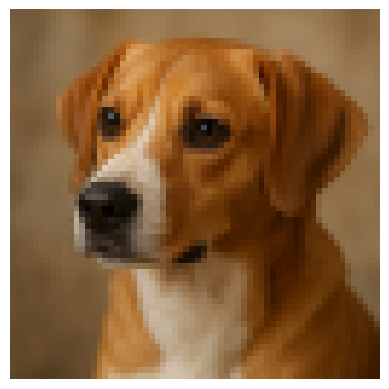

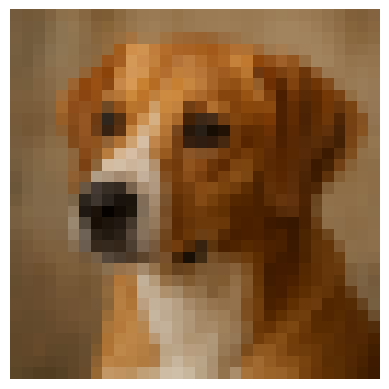

In [3]:
import numpy as np

def downsample_by_two (img_in):
    h_input, w_input, c_input = img_in.shape
    img_lr = np.zeros(shape=(h_input//2, w_input//2, c_input), dtype=np.uint8)

    for j in range(0, h_input//2):
        for i in range(0, w_input//2):
            for c in range(0, c_input):

                # Read the 2x2 block, cast to uint32 to avoid overflow
                p1 = img_in[j*2,     i*2,     c].astype(np.uint32)
                p2 = img_in[j*2 + 1, i*2,     c].astype(np.uint32)
                p3 = img_in[j*2,     i*2 + 1, c].astype(np.uint32)
                p4 = img_in[j*2 + 1, i*2 + 1, c].astype(np.uint32)

                # Compute the average
                avg = (p1 + p2 + p3 + p4) // 4


                  # PRINT the result
              #  print("Average at (", j, ",", i, ", channel", c, ") =", avg)

                # Store result
                img_lr[j, i, c] = avg.astype(np.uint8)


    return img_lr

img_rgb_128 = downsample_by_two(img_rgb)

plt.imshow(img_rgb_128)
plt.axis("off")
plt.show()

img_rgb_64 = downsample_by_two(img_rgb_128)
plt.imshow(img_rgb_64)
plt.axis("off")
plt.show()

img_rgb_32 = downsample_by_two(img_rgb_64)
plt.imshow(img_rgb_32)
plt.axis("off")
plt.show()


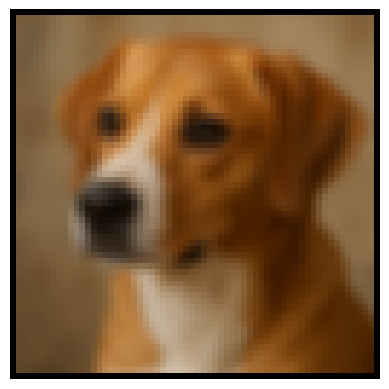

In [4]:
import numpy as np

def conv2(img_in, filter):
    h_input, w_input, c_input = img_in.shape
    img_out = np.zeros(shape=(h_input, w_input, c_input), dtype=np.uint8)

    for c in range(0, 3):
        for j in range(1, h_input-1):
            for i in range(1, w_input-1):
                sumpx = img_out [j,i,c]
                for k in range(0, 3):
                    for l in range(0, 3):
                        origpx = img_in[j-(k-1), i-(l-1), c].astype(np.uint32)
                        filtered = origpx * filter[c, k, l]   # notice axis order!
                        sumpx = sumpx + filtered

                img_out[j, i, c] =(sumpx // 9).astype(np.uint8)# + 128

    return img_out.astype(np.uint8)


# Example filters:

# Vertical Sobel
# filter2D = np.array([[1, 2, 1],
#                      [0, 0, 0],
#                      [-1, -2, -1]])

# Horizontal Sobel
# filter2D = np.array([[1, 0, -1],
#                      [2, 0, -2],
#                      [1, 0, -1]])

# Box filter (low-pass)
filter2D = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]])

# Make it 3D for RGB
filter3D = np.array([filter2D, filter2D, filter2D])

# Apply convolution
filtered_img = conv2(img_rgb_64, filter3D.astype(np.uint32))

plt.imshow(filtered_img)
plt.axis("off")
plt.show()


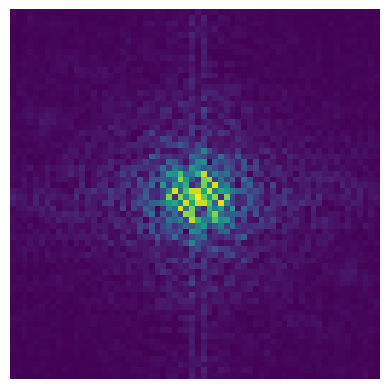

In [ ]:
f_dog = np.fft.fftshift(np.fft.fft2(img_rgb_64[:,:,0].astype(float))) / 64
plt.imshow(np.abs(f_dog).astype(np.uint8))
plt.axis("off")
plt.show()


⭐ Why np.abs() is used
The Fourier transform produces complex numbers (a + bj).
Images cannot display complex numbers.

np.abs() converts each complex number into a magnitude, which is a real number you can show as an image.

So:

Without np.abs() → cannot display

With np.abs() → you get a visible spectrum

⭐ What you must compare
You need to compare the FFT of:

Original image

Low‑pass filtered (box‑blurred) image

What you will see:
Original image FFT
Has lots of bright points far from the center

Means: many high frequencies (edges, details)

Box‑filtered image FFT
Mostly bright in the center

Edges of the spectrum are darker

Means: high frequencies removed, only smooth content left

This proves that a box filter is a low‑pass filter.

⭐ Why np.abs() is needed
np.abs() is used because the Fourier transform produces complex numbers (numbers with real and imaginary parts).
Images cannot display complex values.

np.abs() converts each complex number into its magnitude, which is a real number that can be shown as an image.

In one sentence:

👉 np.abs() is needed to convert the complex FFT output into magnitudes so it can be visualized.

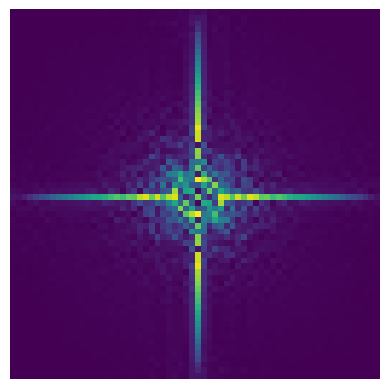

In [ ]:
f_dog = np.fft.fftshift(np.fft.fft2(filtered_img[:,:,0].astype(float))) / 64
plt.imshow(np.abs(f_dog).astype(np.uint8))
plt.axis("off")
plt.show()

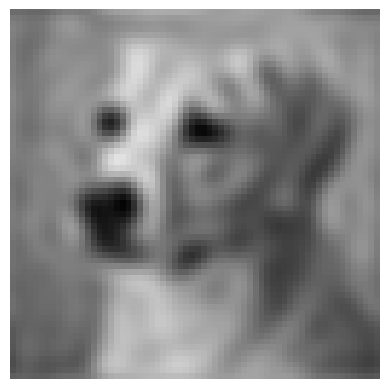

In [ ]:
import numpy as np


f_dog = np.fft.fftshift(np.fft.fft2(img_rgb_64[:,:,0].astype(float)))
mask = cv2.imread('mask64.png',cv2.IMREAD_COLOR)[:,:,0].astype(float)
f_dog_lp = np.multiply(f_dog, mask)
dog_lp = np.fft.ifft2(np.fft.ifftshift(f_dog_lp))

plt.imshow(np.abs(dog_lp).astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.show()